In [14]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np
# Importación de las clases creadas en nuestro archivo de soporte
# -----------------------------------------------------------------------
from src import soporte_encoding as se


# Configuración
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames
from sklearn.model_selection import train_test_split
from category_encoders import TargetEncoder

# Ignorar los warnings
# -----------------------------------------------------------------------
import warnings
warnings.filterwarnings('ignore')

In [15]:
# cargamos los datos con los que estamos trabajando
df = pd.read_csv("datos/datos_stan_estan.csv", index_col = 0)


In [16]:
lista_col_categ = df.select_dtypes(include = "O").columns.tolist()
lista_col_categ

['propertyType',
 'municipality',
 'status',
 'newDevelopment',
 'floor',
 'district',
 'neighborhood',
 'hasLift',
 'hasParkingSpace',
 'isParkingSpaceIncludedInPrice',
 'typology',
 'subTypology']

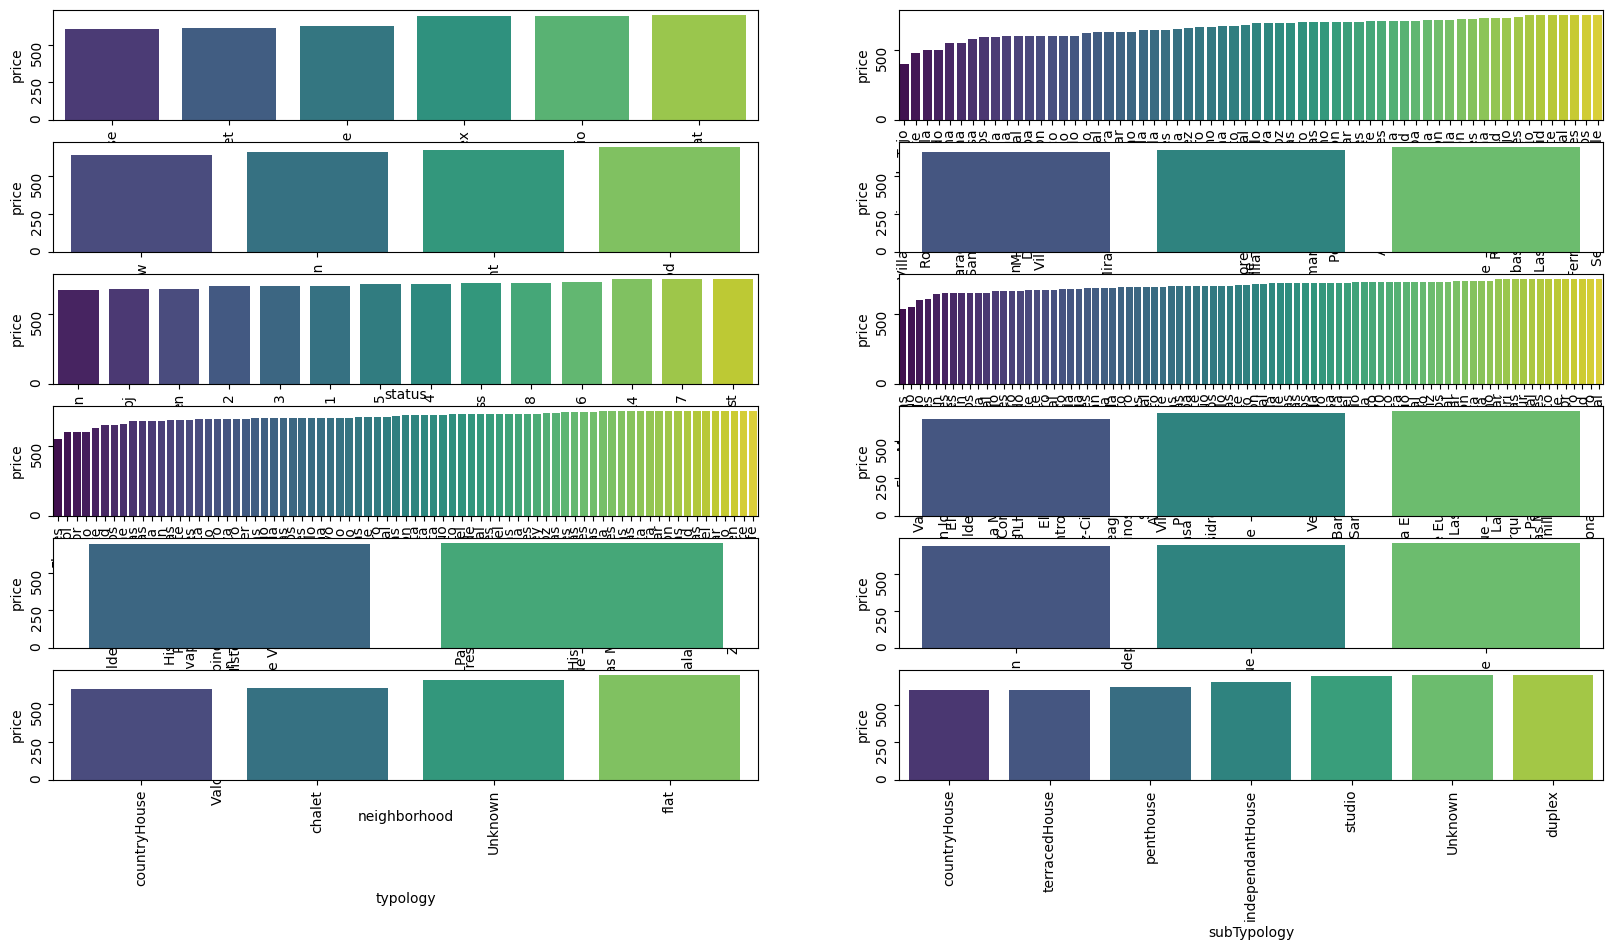

In [17]:
# instanciamos la clase de Encoding
analisis_encoding = se.Analisis_Visual_Encoding(variable_respuesta = "price", dataframe = df, lista_variables_categorias = lista_col_categ)
analisis_encoding.crear_barplot()

En este análisis, se observa que todas las variables categóricas, al ser contrastadas con la variable respuesta, muestran variaciones en sus magnitudes. Esta observación sugiere la posibilidad de una estructura ordenada en las variables. Sin embargo, esto no lo determina todo y deberíamos explorar más a fondo la presencia de un orden significativo en el conjunto de datos.

In [22]:
valores_unicos = {}

# Iterar a través de las columnas categóricas y obtener los valores únicos
for col in lista_col_categ:
    valores_unicos[col] = df[col].unique().tolist()

# Mostrar los valores únicos
for col, valores in valores_unicos.items():
    print(f"Columna: {col}")
    print(f"Valores únicos: {valores}\n")

Columna: propertyType
Valores únicos: ['flat', 'penthouse', 'studio', 'duplex', 'chalet', 'countryHouse']

Columna: municipality
Valores únicos: ['Madrid', 'San Sebastián de los Reyes', 'Villamanrique de Tajo', 'Rascafría', 'Manzanares el Real', 'Miraflores de la Sierra', 'Galapagar', 'Arganda', 'San Lorenzo de el Escorial', 'Aldea del Fresno', 'Aranjuez', 'Villanueva del Pardillo', 'Las Rozas de Madrid', 'Navalcarnero', 'Alcalá de Henares', 'El Escorial', 'Leganés', 'Coslada', 'Torrejón de Ardoz', 'Camarma de Esteruelas', 'Alcorcón', 'Pinto', 'Valdemoro', 'Collado Villalba', 'Getafe', 'Paracuellos de Jarama', 'El Molar', 'Parla', 'Tres Cantos', 'Quijorna', 'Valdemorillo', 'Pedrezuela', 'Daganzo de Arriba', 'Guadarrama', 'Cobeña', 'El Álamo', 'Algete', 'Rivas-Vaciamadrid', 'Los Santos de la Humosa', 'San Fernando de Henares', 'Fuenlabrada', 'Mataelpino', 'Villa del Prado', 'Los Molinos', 'Colmenar Viejo', 'Móstoles', 'Navalafuente', 'Meco', 'Robledo de Chavela', 'Campo Real', 'Villavic

In [19]:
# instanciamos la clase de Asunciones, para poder decir qué método usar para el análisis estadístico
asunciones = se.Asunciones(dataframe = df, columna_numerica = "price")
print("\n-------------\n")


for categoria in lista_col_categ:   

    print(f"Estamos analizando la variable {categoria.upper()}")
    
    # comprobamos la asunción de normalidad
    asunciones.identificar_normalidad(metodo = "kolmogorov") 

    # comprobamos la homogeneidad de varianzas
    asunciones.identificar_homogeneidad(columna_categorica = categoria)

    # instanciamos la clase para evaluar si hay diferencias entre los distintos grupos de las variables categóricas
    test = se.TestEstadisticos(df, "price", categoria)
    test.run_all_tests()
    print("\n###########################\n")


-------------

Estamos analizando la variable PROPERTYTYPE
Para la columna price, los datos no siguen una distribución normal según el test de Kolmogorov-Smirnov.
En la variable propertyType las varianzas NO son homogéneas entre grupos.
Generando grupos...
Grupos generados: ['flat', 'penthouse', 'studio', 'duplex', 'chalet', 'countryHouse']



Realizando test de K...
Estadístico de prueba: 10.491276765664804
Valor p: 0.062453362538402654
No hay evidencia suficiente para concluir que hay una diferencia significativa.
Los resultados del test de Tukey son: 



,meandiff,p-adj,lower,upper,group_diff
0,-10.0000,1.0000,-207.3147,187.3147,chalet-countryHouse
1,79.2857,0.2949,-29.4294,188.0008,chalet-duplex
2,87.5596,0.1184,-11.6306,186.7497,chalet-flat
3,9.9000,0.9999,-102.5867,122.3867,chalet-penthouse
4,79.6250,0.2206,-22.0687,181.3187,chalet-studio
5,89.2857,0.6984,-87.5915,266.1629,countryHouse-duplex
6,97.5596,0.5771,-73.6282,268.7473,countryHouse-flat
7,19.9000,0.9996,-159.3200,199.1200,countryHouse-penthouse
8,89.6250,0.6724,-83.0254,262.2754,countryHouse-studio
9,8.2739,0.9959,-38.5355,55.0832,duplex-flat



###########################

Estamos analizando la variable MUNICIPALITY
Para la columna price, los datos no siguen una distribución normal según el test de Kolmogorov-Smirnov.
En la variable municipality las varianzas son homogéneas entre grupos.
Generando grupos...
Grupos generados: ['Madrid', 'San Sebastián de los Reyes', 'Villamanrique de Tajo', 'Rascafría', 'Manzanares el Real', 'Miraflores de la Sierra', 'Galapagar', 'Arganda', 'San Lorenzo de el Escorial', 'Aldea del Fresno', 'Aranjuez', 'Villanueva del Pardillo', 'Las Rozas de Madrid', 'Navalcarnero', 'Alcalá de Henares', 'El Escorial', 'Leganés', 'Coslada', 'Torrejón de Ardoz', 'Camarma de Esteruelas', 'Alcorcón', 'Pinto', 'Valdemoro', 'Collado Villalba', 'Getafe', 'Paracuellos de Jarama', 'El Molar', 'Parla', 'Tres Cantos', 'Quijorna', 'Valdemorillo', 'Pedrezuela', 'Daganzo de Arriba', 'Guadarrama', 'Cobeña', 'El Álamo', 'Algete', 'Rivas-Vaciamadrid', 'Los Santos de la Humosa', 'San Fernando de Henares', 'Fuenlabrada', 'Mata

,meandiff,p-adj,lower,upper,group_diff
0,-10.0909,1.0000,-218.6427,198.4609,Alcalá de Henares-Alcobendas
1,14.9091,1.0000,-79.0315,108.8497,Alcalá de Henares-Alcorcón
2,-42.5909,1.0000,-193.2310,108.0492,Alcalá de Henares-Aldea del Fresno
3,44.9091,1.0000,-163.6427,253.4609,Alcalá de Henares-Algete
4,-51.0000,0.8634,-126.3201,24.3201,Alcalá de Henares-Aranjuez
...,...,...,...,...,...
1886,48.6667,1.0000,-186.8549,284.1882,Villalbilla-Villanueva del Pardillo
1887,-40.0000,1.0000,-328.4538,248.4538,Villalbilla-Villaviciosa de Odón
1888,288.6667,0.0011,53.1451,524.1882,Villamanrique de Tajo-Villanueva del Pardillo
1889,200.0000,0.8228,-88.4538,488.4538,Villamanrique de Tajo-Villaviciosa de Odón



###########################

Estamos analizando la variable STATUS
Para la columna price, los datos no siguen una distribución normal según el test de Kolmogorov-Smirnov.
En la variable status las varianzas son homogéneas entre grupos.
Generando grupos...
Grupos generados: ['good', 'Unknown', 'newdevelopment', 'renew']

Realizando test de K...
Estadístico de prueba: 11.541040965775425
Valor p: 0.009132723494666343
Hay una diferencia significativa entre los datos antes y después
Los resultados del test de Tukey son: 



,meandiff,p-adj,lower,upper,group_diff
0,32.8153,0.2012,-10.1772,75.8078,Unknown-good
1,13.8791,0.9349,-46.7829,74.5412,Unknown-newdevelopment
2,-22.4286,0.9621,-141.4847,96.6276,Unknown-renew
3,-18.9361,0.6914,-63.4855,25.6132,good-newdevelopment
4,-55.2438,0.5785,-166.9538,56.4662,good-renew
5,-36.3077,0.8619,-155.9349,83.3195,newdevelopment-renew



###########################

Estamos analizando la variable NEWDEVELOPMENT
Para la columna price, los datos no siguen una distribución normal según el test de Kolmogorov-Smirnov.
En la variable newDevelopment las varianzas son homogéneas entre grupos.
Generando grupos...
Grupos generados: ['False', 'Unknown', 'True']

Realizando test de K...
Estadístico de prueba: 9.08974209870809
Valor p: 0.010621542282685525
Hay una diferencia significativa entre los datos antes y después
Los resultados del test de Tukey son: 



,meandiff,p-adj,lower,upper,group_diff
0,-18.5972,0.5291,-59.2484,22.0539,False-True
1,-32.4763,0.1268,-71.7065,6.7538,False-Unknown
2,-13.8791,0.8255,-69.2396,41.4813,True-Unknown



###########################

Estamos analizando la variable FLOOR
Para la columna price, los datos no siguen una distribución normal según el test de Kolmogorov-Smirnov.
En la variable floor las varianzas son homogéneas entre grupos.
Generando grupos...
Grupos generados: ['3', 'bj', '2', 'Unknown', '1', '5', 'en', '4', 'st', '8', '7', '6', '14', 'ss']

Realizando test de K...
Estadístico de prueba: 31.48890585086721
Valor p: 0.002858350329048415
Hay una diferencia significativa entre los datos antes y después
Los resultados del test de Tukey son: 



,meandiff,p-adj,lower,upper,group_diff
0,48.2429,0.9999,-156.8821,253.3678,1-14
1,-5.5786,1.0000,-42.0943,30.9372,1-2
2,-3.7780,1.0000,-41.9469,34.3909,1-3
3,13.8489,0.9983,-29.1592,56.8571,1-4
4,12.6873,1.0000,-59.4370,84.8116,1-5
...,...,...,...,...,...
86,41.6552,1.0000,-163.7684,247.0787,bj-ss
87,71.6552,0.9962,-133.7684,277.0787,bj-st
88,40.8333,1.0000,-179.1611,260.8277,en-ss
89,70.8333,0.9983,-149.1611,290.8277,en-st



###########################

Estamos analizando la variable DISTRICT
Para la columna price, los datos no siguen una distribución normal según el test de Kolmogorov-Smirnov.
En la variable district las varianzas son homogéneas entre grupos.
Generando grupos...
Grupos generados: ['Hortaleza', 'Centro Urbano', 'Unknown', 'Puente de Vallecas', 'Ciudad Lineal', 'Casco Antiguo', 'Moncloa', 'Centro', 'Centro - Casco Histórico', 'Retiro', 'Arganzuela', 'Latina', 'Barrio de Salamanca', 'Barajas', 'Las Matas- Peñascales', 'Chamberí', 'Villaverde', 'La Dehesa - El Pinar', 'Reyes Católicos', 'Chorrillo', 'Valdepelayo - Montepinos - Arroyo Culebro', 'Valleaguado - La Cañada', 'Suroeste', 'San Isidro - Los Almendros', 'San José - Buenos Aires', 'Hospital', 'Parque de la Coruña - Las Suertes', 'Valderas - Los Castillos', 'Getafe Centro', 'San Blas', 'Val', 'Casco Urbano', 'Casco Histórico', 'Los Llanos - Valle Pardo', 'Ensanche', 'Dehesa - El Soto', 'Pintores-Ferial', 'Carabanchel', 'Zona Estación- 

,meandiff,p-adj,lower,upper,group_diff
0,23.5714,1.0,-243.5301,290.6730,Alcobendas Centro-Arganzuela
1,3.7500,1.0,-275.5915,283.0915,Alcobendas Centro-Barajas
2,27.5000,1.0,-278.5033,333.5033,Alcobendas Centro-Barrio de Salamanca
3,40.0000,1.0,-313.3422,393.3422,Alcobendas Centro-Buenavista
4,28.0909,1.0,-232.8696,289.0514,Alcobendas Centro-Carabanchel
...,...,...,...,...,...
3481,40.0000,1.0,-266.0033,346.0033,Zona Estación-Zona Industrial
3482,-10.0000,1.0,-316.0033,296.0033,Zona Estación-Zona Pueblo
3483,0.0000,1.0,-353.3422,353.3422,Zona Estación- Centro-Zona Industrial
3484,-50.0000,1.0,-403.3422,303.3422,Zona Estación- Centro-Zona Pueblo



###########################

Estamos analizando la variable NEIGHBORHOOD
Para la columna price, los datos no siguen una distribución normal según el test de Kolmogorov-Smirnov.
En la variable neighborhood las varianzas son homogéneas entre grupos.
Generando grupos...
Grupos generados: ['Canillas', 'Unknown', 'San Diego', 'San Pascual', 'Argüelles', 'Adelfas', 'Palos de Moguer', 'Aluche', 'Goya', 'Lavapiés-Embajadores', 'Pacífico', 'Timón', 'Las Matas- Peñascales', 'Chueca-Justicia', 'Águilas', 'Trafalgar', 'San Cristóbal', 'Butarque', 'Ibiza', 'Chopera', 'Palacio', 'Palomeras sureste', 'Valdepelayo-Montepinos-Arroyo Culebro', 'Villaverde Alto', 'Flores', 'Acacias', 'Ventas', 'Zona Renfe', 'Valderas - Los Castillos', 'Casco Histórico de Barajas', 'Rejas', 'Pueblo Nuevo', 'Entrevías', 'Los Rosales', 'Quintana', 'Opañel', 'Berruguete', 'Casco Antiguo', 'Pinar del Rey', 'Ensanche de Vallecas - La Gavia', 'Las Tablas', 'Sol', 'Puerta del Ángel', 'Casco Histórico de Vallecas', 'Amposta', 'V

,meandiff,p-adj,lower,upper,group_diff
0,-50.0000,1.0,-423.9813,323.9813,Acacias-Adelfas
1,-50.0000,1.0,-423.9813,323.9813,Acacias-Almendrales
2,-93.3333,1.0,-398.6878,212.0211,Acacias-Aluche
3,-15.0000,1.0,-338.8773,308.8773,Acacias-Ambroz
4,-27.5000,1.0,-323.1582,268.1582,Acacias-Amposta
...,...,...,...,...,...
2770,0.0000,1.0,-373.9813,373.9813,Zona Centro Joven-Zona Renfe
2771,-75.0000,1.0,-380.3544,230.3544,Zona Centro Joven-Águilas
2772,50.0000,1.0,-323.9813,423.9813,Zona Pueblo-Zona Renfe
2773,-25.0000,1.0,-330.3544,280.3544,Zona Pueblo-Águilas



###########################

Estamos analizando la variable HASLIFT
Para la columna price, los datos no siguen una distribución normal según el test de Kolmogorov-Smirnov.
En la variable hasLift las varianzas son homogéneas entre grupos.
Generando grupos...
Grupos generados: ['True', 'False', 'Unknown']

Realizando test de K...
Estadístico de prueba: 13.627872283280148
Valor p: 0.0010983610754482008
Hay una diferencia significativa entre los datos antes y después
Los resultados del test de Tukey son: 



,meandiff,p-adj,lower,upper,group_diff
0,14.6193,0.0694,-0.8887,30.1274,False-True
1,-37.4113,0.0345,-72.6565,-2.1662,False-Unknown
2,-52.0307,0.0016,-87.1432,-16.9181,True-Unknown



###########################

Estamos analizando la variable HASPARKINGSPACE
Para la columna price, los datos no siguen una distribución normal según el test de Kolmogorov-Smirnov.
En la variable hasParkingSpace las varianzas son homogéneas entre grupos.
Generando grupos...
Grupos generados: ['Unknown', 'True']

Realizando test de K...
Estadístico de prueba: 0.05096622100844329
Valor p: 0.8213904262103933
No hay evidencia suficiente para concluir que hay una diferencia significativa.
Los resultados del test de Tukey son: 



,meandiff,p-adj,lower,upper,group_diff
0,-8.0436,0.2965,-23.1748,7.0876,True-Unknown



###########################

Estamos analizando la variable ISPARKINGSPACEINCLUDEDINPRICE
Para la columna price, los datos no siguen una distribución normal según el test de Kolmogorov-Smirnov.
En la variable isParkingSpaceIncludedInPrice las varianzas son homogéneas entre grupos.
Generando grupos...
Grupos generados: ['Unknown', 'True', 'False']

Realizando test de K...
Estadístico de prueba: 0.4249221455412007
Valor p: 0.8085917919469948
No hay evidencia suficiente para concluir que hay una diferencia significativa.
Los resultados del test de Tukey son: 



,meandiff,p-adj,lower,upper,group_diff
0,-11.4684,0.9294,-85.5051,62.5684,False-True
1,-18.9593,0.8130,-91.7230,53.8045,False-Unknown
2,-7.4909,0.6064,-25.9695,10.9877,True-Unknown



###########################

Estamos analizando la variable TYPOLOGY
Para la columna price, los datos no siguen una distribución normal según el test de Kolmogorov-Smirnov.
En la variable typology las varianzas son homogéneas entre grupos.
Generando grupos...
Grupos generados: ['flat', 'Unknown', 'chalet', 'countryHouse']

Realizando test de K...
Estadístico de prueba: 12.43154072443159
Valor p: 0.006042032929186166
Hay una diferencia significativa entre los datos antes y después
Los resultados del test de Tukey son: 



,meandiff,p-adj,lower,upper,group_diff
0,-52.4286,0.5246,-151.8508,46.9937,Unknown-chalet
1,-62.4286,0.7516,-224.1864,99.3293,Unknown-countryHouse
2,32.7983,0.1952,-9.8312,75.4278,Unknown-flat
3,-10.0000,0.9990,-190.4485,170.4485,chalet-countryHouse
4,85.2269,0.0738,-5.4005,175.8542,chalet-flat
5,95.2269,0.3968,-61.2792,251.7329,countryHouse-flat



###########################

Estamos analizando la variable SUBTYPOLOGY
Para la columna price, los datos no siguen una distribución normal según el test de Kolmogorov-Smirnov.
En la variable subTypology las varianzas NO son homogéneas entre grupos.
Generando grupos...
Grupos generados: ['Unknown', 'penthouse', 'duplex', 'studio', 'independantHouse', 'terracedHouse', 'countryHouse']

Realizando test de K...
Estadístico de prueba: 8.02058172495288
Valor p: 0.23659931177055127
No hay evidencia suficiente para concluir que hay una diferencia significativa.
Los resultados del test de Tukey son: 



,meandiff,p-adj,lower,upper,group_diff
0,-96.6007,0.6779,-274.8687,81.6673,Unknown-countryHouse
1,3.3993,1.0000,-51.2886,58.0872,Unknown-duplex
2,-46.6007,0.9872,-224.8687,131.6673,Unknown-independantHouse
3,-76.7007,0.0017,-133.9603,-19.4412,Unknown-penthouse
4,-7.0790,0.9898,-35.3690,21.2110,Unknown-studio
5,-96.6007,0.6779,-274.8687,81.6673,Unknown-terracedHouse
6,100.0000,0.6853,-85.8667,285.8667,countryHouse-duplex
7,50.0000,0.9971,-201.6647,301.6647,countryHouse-independantHouse
8,19.9000,0.9999,-166.7396,206.5396,countryHouse-penthouse
9,89.5217,0.7590,-90.3560,269.3995,countryHouse-studio



###########################



**¿Por qué hemos elegido el test de Kruskal?**: 
- En nuestro caso, la variable respuesta ("price") no es normal

- Entre las categorías de las variables categóricas no hay homogeneidad de varianzas. 

Por lo tanto, tendremos que usar el test de Wilcoxon, el de MannWithney o el de Kruskal. Sin embargo, el test de Wilcoxon NO admite muestras con distintos tamaños (por lo que no podremos usarlo) y el test de MannWithney no acepta más de dos grupos para comprar. Por todo esto, solo nos queda un test que podemos usar, el test de Kruskal.

In [26]:
df['exterior'] = df['exterior'].astype('object') 
df['showAddress'] = df['showAddress'].astype('object') 

In [27]:


# separamos la variable a predecir y las independientes
y = df['price']
X = df.drop('price', axis=1)


In [28]:
target_encoder = TargetEncoder(lista_col_categ)
variables_encoded = target_encoder.fit_transform(df, df["price"])
variables_encoded


,price,propertyType,size,exterior,rooms,bathrooms,municipality,showAddress,distance,status,newDevelopment,floor,district,neighborhood,hasLift,hasParkingSpace,isParkingSpaceIncludedInPrice,typology,subTypology,priceByArea_knn,parkingSpacePrice_knn,price_robust,rooms_robust,bathrooms_robust,priceByArea_knn_robust
0,750.0,697.559567,60.0,694.964912,1,1,705.594114,696.478393,7037,695.243827,694.904908,697.689843,701.253737,700.317911,702.252872,691.040741,691.040741,695.226866,696.600707,13.000000,3795.0,0.555556,-1.0,0.0,0.166667
1,750.0,697.559567,70.0,694.964912,2,1,701.418584,691.770677,16145,695.243827,694.904908,678.664014,700.208637,679.793298,687.633544,691.040741,691.040741,695.226866,696.600707,11.000000,3795.0,0.555556,0.0,0.0,-0.166667
2,400.0,673.290678,56.0,694.964912,2,1,654.819074,691.770677,11666,695.243827,694.904908,696.092223,645.657771,679.793298,687.633544,691.040741,691.040741,695.226866,673.290678,12.000000,3795.0,-3.333333,0.0,0.0,0.000000
3,590.0,697.559567,56.0,694.964912,2,1,679.539684,691.770677,11666,695.243827,694.904908,670.416613,645.657771,679.793298,687.633544,691.040741,691.040741,695.226866,696.600707,12.000000,3795.0,-1.222222,0.0,0.0,0.000000
4,684.0,689.814572,45.0,694.964912,0,1,705.594114,696.478393,10656,682.123310,682.123310,670.416613,645.657771,679.793298,673.705516,691.040741,691.040741,682.123310,696.600707,13.294985,3795.0,-0.177778,-2.0,0.0,0.215831
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
348,640.0,697.559567,69.0,694.964912,2,1,686.045108,696.478393,29311,695.243827,694.904908,696.092223,645.657771,679.793298,702.252872,699.073061,698.516348,695.226866,696.600707,9.000000,3795.0,-0.666667,0.0,0.0,-0.500000
349,700.0,697.559567,54.0,694.964912,1,1,696.177593,691.770677,11656,695.243827,694.904908,701.698078,688.615198,679.793298,702.252872,691.040741,691.040741,695.226866,696.600707,13.000000,3795.0,0.000000,-1.0,0.0,0.166667
350,700.0,697.559567,59.0,694.964912,1,1,705.594114,696.478393,7529,695.243827,694.904908,697.480890,701.649456,697.409964,702.252872,699.073061,698.516348,695.226866,696.600707,12.000000,3795.0,0.000000,-1.0,0.0,0.000000
351,700.0,697.559567,75.0,694.964912,2,1,699.617387,696.478393,30359,695.243827,694.904908,701.698078,693.851617,679.793298,687.633544,691.040741,691.040741,695.226866,696.600707,9.000000,3795.0,0.000000,0.0,0.0,-0.500000


In [30]:
variables_encoded.to_csv("datos/datos_coding.csv")